
#<계획표>
>
5월  9일(월) ~ 13일(금) 개인 분석 

17일(화) 조합 후 레포트 작성

5월 18일(수) ~ 19일(목) ppt 및 대본 작업

5월 20일(금) 오전까지 프로젝트 최종 점검 제출

5월 23일(월) 발표


#프로젝트 가이드라인 (변치웅 강사님의 꿀팁!)
1. 프로젝트 수행목적, 동기
2. 사용할 데이터의 변수 설명 (수집경로, 단위 포함)
3. 최소 10,000개 샘플 사용
4. 모델 선택 및 최적화과정 포함
5. 솔루션 제공 및 문제점 도출
- 상기 내용은 강제하는 내용은 아니지만 포함될 경우 좋은 프로젝트로 평가받는 요소들 입니다.
- 데이터를 다각화 하여 보는게 중요


#<프로젝트>

1. 문제정의 (선정이유)
2. 데이터 수집
3. 데이터 탐색 (이슈사항 검토 ex.생존율에는 어떤 요소가 영향을 주는지 / 분포는 어떻게 되는지)
4. 데이터 전처리
5. 모델링 (데이터 분포 분석 -> 상관관계 파악 -> 시각화)
6. 결과

>대주제 : 매출에 영향을 끼치는 요인

매출의 기준: 최종 결제까지 간 사람
(type == payment and state == completed) - (type == refund and state == completed )

각 문제별로 새 데이터프레임 만들어서 적용 


- 메인(+서브, 강의명) 카테고리
1. 10개의 카테고리 중 환불된 강의 카테고리는?
(어떤 강의들이 환불되는지?? 어떤 특징??)

- 할인금액
1. 얼마 할인해줬을 때, 가장 많은 결제를 이끌어냈는지
2. 같은 카테고리기준으로 할인 혜택을 받은 사람과 안받은 사람의 비율

- 재결제율:
1. 웰컴 할인쿠폰을 받은 사람 중 재결제한 사람(신규 유입에 쿠폰의 영향?)
2. 동일한 결제 수단으로 결제 여부

- 강의 가격: 
1. 같은 카테고리 안에서 서브 카테고리별로 높은 가격 vs 낮은가격 어떤 강의 인기? 
-> .describe()사용 (실구매가, 정가 비교)



( 시간되면 )모델링에 추가
1. 어느 결제대행사로 결제하는지 + 이벤트/할인 많이 해서? 
2. 수강율이 낮은 강의 프로모션 제안 





주제 선택 (대주제 2개 이상) 
월요일까지 완료해오기 (금요일까지 권장)

기태: 강의 가격 + a

성철: 재결제율 + 강의 가격

태성: 메인 카테고리 + 할인 금액

태환

성수: 할인금액 + 재결제율

선미: 재결제율 + 카테고리


------------

#목표

#데이터 살펴보기


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#한글화
plt.rc('font', family='AppleGothic')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:

df=pd.read_excel('/content/drive/MyDrive/프로젝트/미니프로젝트/파이널프로젝트_RAW_210329_210926.xlsx')
df = df[['customer_id', 'course_id', 'type', 'state' , 'course_title', 'category_title', 'format', 'completed_at', 'transaction_amount', 'coupon_title', 'coupon_discount_amount', 'sale_price', 'pg', 'method', 'subcategory_title', 'marketing_start_at']]
df.head()


,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,NaN,VBANK,개발자 커리어,NaT
1,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
2,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,NaN,CARD,NaN,2021-03-04
4,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


| 컬럼 | 설명 |
| ---- | ----|
| (삭제) id | << 버려도 됨..??? |
| customer_id | 중복있음!! +순수 고객수 파악하려면 전처리 필요 |
| course_id | 어떤 강의 듣는지(빈 값은 폐강으로 추측) |
| type    | 해당 강좌의 현재 결제 진행상태(order는 장바구니, payment가 최종 결제) |
| state                   | type의 진행상황 |
| course_title            | 강의 제목 |
| category_title          | 강의 카테고리 제목 |
| (삭제 보류)format         | 강의 과정 분류 종류|
| completed_at            | 강의 결제 완료 시각|
| transaction_amount      | 실 결제 금액|
| coupon_title            | 쿠폰명|
| coupon_discount_amount  | 할인된 금액|
| sale_price              | 판매 금액|
| (삭제) tax_free_amount    | 면세액 |
| pg                      | 결제대행사 (빈칸은 그 외의 결제대행사)|
| method                  | 결제 방법|
| subcategory_title       | 강의 부 카테고리 제목|
| marketing_start_at      | 해당 강의가 열린날 (일단위로 기록됨)|


____
<유의할 사항>
- 쿠폰 말고도 이벤트같은 다른 조건에 의한 할인도 있다


#데이터 타입과 결측값 확인하기

>결측치 제거

In [ ]:
#결측치 제거
df = df.dropna(subset=['category_title'])
df.isna().sum()

customer_id                   0
course_id                  5183
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              73578
coupon_discount_amount    73578
sale_price                 1112
pg                        15058
method                    13095
subcategory_title         19805
marketing_start_at        17955
dtype: int64

>결제 완료한 사람 중 환불하지 않은 사람만 판별 

In [ ]:
# 결제가 완료된 사람의 데이터
df_pc = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]
df_pc

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
4,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
14,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105412,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,KAKAO,CARD,영상 편집,2020-12-02
105413,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105416,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [ ]:
 #환불이 완료된 사람의 데이터
df_rc =df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]
df_rc.head()

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
651,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,NaN,VBANK,NaN,NaT
652,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
666,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,NaN,NaN,89000.0,NaN,CARD,일러스트,2021-02-19
672,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,NaN,NaN,340000.0,NaN,VBANK,NaN,2021-03-08
675,456086.0,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT


In [ ]:
 #결제가 완료된 사람과 환불이 완료된 사람의 데이터를 합쳐준다.
df_total = pd.merge(df_pc,df_rc,how='outer')
df_total

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
1,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
2,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
3,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
4,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56715,600073.0,206065.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,NaN,NaN,179000.0,NAVER,CARD,백엔드 개발,2021-07-15
56716,645911.0,NaN,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,NaN,NaN,1400000.0,INICIS,CARD,NaN,NaT
56717,506356.0,206720.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,NaN,NaN,259000.0,NAVER,CARD,영상 편집,2021-08-17
56718,604077.0,205569.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,NaN,NaN,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17


In [ ]:
#세 컬럼의 값이 모두 일치하면 마지막 값을 제외하고 삭제.
df_total = df_total.drop_duplicates(['customer_id' , 'course_title' , 'coupon_title'],keep = 'last')

In [ ]:
# 남아있는 REFUND는 제공된 데이터 기간 전에 결제를 완료하고, 제공된 기간 내에 환불이 완료된 데이터이다.
# 정해진 기간내의 환불 비율을 알고싶으므로 PAYMENT만 골라낸다.
df_pay = df_total['type'] == 'PAYMENT'
df_pay = df_total[df_pay]
df_pay

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
1,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
2,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
3,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
4,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
52895,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,KAKAO,CARD,영상 편집,2020-12-02
52896,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
52897,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


>카테고리 컬럼 수정


In [ ]:
# 1. 띄어쓰기 차이로 다른 강의로 구분된 '데이터사이언스'와 '데이터 사이언스'를 합쳐준다.
# 2. 디자인 카테고리에 서브 카테고리로 속해있는 '일러스트' 카테고리를 '디자인'카테고리에 편입시켜준다.
# 3. '교육','지식콘텐츠','비즈니스','파이낸스','관리' 카테고리는 현재 폐강된 카테고리들로 삭제해준다.
df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14076
업무 생산성,13323
디자인,12009
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501
크리에이티브,2250
교육,1031


In [ ]:
# 카테고리 변경
df_pay= df_pay.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
df_pay= df_pay.replace({'category_title':{'일러스트':'디자인'}})
df_pay['category_title'].value_counts().to_frame()

,category_title
프로그래밍,17006
데이터사이언스,6659
업무 생산성,6512
디자인,5594
영상/3D,5036
마케팅,4563
부동산/금융,2808
투자/재테크,1447
교육,906
크리에이티브,800


In [ ]:
# 불필요한 카테고리 삭제
df_pay = df_pay[df_pay.category_title != '교육']
df_pay = df_pay[df_pay.category_title != '지식콘텐츠']
df_pay = df_pay[df_pay.category_title != '비즈니스']
df_pay = df_pay[df_pay.category_title != '파이낸스']
df_pay = df_pay[df_pay.category_title != '관리']
df_pay = df_pay[df_pay.category_title != '크리에이티브']
df_pay['category_title'].value_counts()

프로그래밍      17006
데이터사이언스     6659
업무 생산성      6512
디자인         5594
영상/3D       5036
마케팅         4563
부동산/금융      2808
투자/재테크      1447
Name: category_title, dtype: int64

In [ ]:
# 결제 완료건 nan처리.
df_pay['coupon_title'].fillna("nan", inplace = True)


In [ ]:
# 결제 완료한 웰컴쿠폰 사용자 분류.
df_wcpc = df_pay[(df_pay['coupon_title'].str.contains('웰컴')) | (df_pay['coupon_title'].str.contains('WELCOME'))]


In [ ]:
#중복값 제거
df_wp = df_wcpc.drop_duplicates(subset='customer_id')
df_wp

In [ ]:
# 결제 완료한 웰컴쿠폰 사용자의 customer_id만 추출
df_wcpc.drop_duplicates(['customer_id'],keep='first')
wpid = df_wcpc['customer_id'].unique()

In [ ]:
# 위 customer_id 추출내역을 DataFrame으로 변환
df_newuser_group = pd.DataFrame(wpid, columns=['customer_id'])
df_newuser_group

,customer_id
0,478028.0
1,478033.0
2,478035.0
3,471759.0
4,445723.0
...,...
10813,604077.0
10814,646968.0
10815,638903.0
10816,640697.0


In [ ]:
# 결제 완료된 항목에서 웰컴쿠폰 사용자 제하기.

spac = df_pay[(df_pay['coupon_title'].str.contains('웰컴')) | (df_pay['coupon_title'].str.contains('WELCOME'))].index
df_pay.drop(spac,inplace=True)
df_pay

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,nan,NaN,263000.0,NaN,CARD,NaN,2020-11-27
5,478031.0,NaN,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,nan,NaN,299000.0,NaN,CARD,NaN,NaT
6,455311.0,203146.0,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 15:43:59,149500,nan,NaN,149500.0,NaN,CARD,DevOps,2021-02-08
8,478051.0,203499.0,PAYMENT,COMPLETED,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,업무 생산성,올인원,2021-03-28 15:49:21,118000,nan,NaN,118000.0,NaN,VBANK,PPT/보고서,2020-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52892,120686.0,NaN,PAYMENT,COMPLETED,[한정판매] 자연어 A-Z 끝장 패키지(~9월),데이터사이언스,올인원,2021-09-25 12:29:39,481000,nan,NaN,481000.0,INICIS,CARD,NaN,NaT
52893,545804.0,NaN,PAYMENT,COMPLETED,프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스),디자인,올인원,2021-09-25 13:25:49,1800000,nan,NaN,1800000.0,INICIS,CARD,NaN,NaT
52894,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
52895,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,nan,NaN,149000.0,KAKAO,CARD,영상 편집,2020-12-02


In [ ]:
# 웰컴쿠폰을 사용한 결제자의 아이디를 기준으로 전체 결제 내역에서 동일 결제자의 결제내역을 가져온다. --> 순 재결제자들의 결제내역들
df_tt = pd.merge(df_pay, df_newuser_group, on = 'customer_id')

df_tt

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,477954.0,NaN,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 21:32:02,299000,nan,NaN,299000.0,NaN,CARD,NaN,NaT
1,183570.0,201582.0,PAYMENT,COMPLETED,올인원 패키지 : 컴퓨터 공학 전공 필수,프로그래밍,올인원,2021-03-28 21:35:22,125500,nan,NaN,125500.0,NaN,TRANS,개발자 커리어,2019-09-30
2,183570.0,200328.0,PAYMENT,COMPLETED,올인원 패키지 : 파이썬 웹 개발,프로그래밍,올인원,2021-03-28 21:38:20,124000,nan,NaN,124000.0,NaN,TRANS,NaN,NaT
3,183570.0,203525.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-03-28 21:41:38,110500,nan,NaN,110500.0,NaN,TRANS,백엔드 개발,2021-02-01
4,469863.0,202566.0,PAYMENT,COMPLETED,올인원 패키지 : 스케치&피그마를 활용한 모바일 UI 디자인,디자인,올인원,2021-03-28 22:11:28,101500,[럭키룰렛] 올인원패키지,20000.0,121500.0,NaN,CARD,UX/UI,2020-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,599109.0,205949.0,PAYMENT,COMPLETED,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,프로그래밍,올인원,2021-09-23 23:35:26,171000,nan,NaN,171000.0,INICIS,CARD,모바일앱,2021-07-09
2471,599109.0,206257.0,PAYMENT,COMPLETED,초격차 패키지 : 게임 개발자 취업의 모든 것,프로그래밍,올인원,2021-09-23 23:36:10,269000,nan,NaN,269000.0,INICIS,CARD,게임,2021-08-09
2472,543401.0,205421.0,PAYMENT,COMPLETED,올인원 패키지 : 박은종의 객체지향 설계를 위한 디자인패턴 with 자바,프로그래밍,올인원,2021-09-24 10:16:36,130000,nan,NaN,130000.0,INICIS,CARD,DevOps,2021-06-21
2473,455280.0,203529.0,PAYMENT,COMPLETED,올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화,업무 생산성,올인원,2021-09-24 17:58:18,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,159000.0,159000.0,NaN,PROMOTION,업무자동화,2020-11-25


In [ ]:
# 재결제자들의 내역에서 중복되는 아이디 제거.
df_ttd = df_tt.drop_duplicates(subset='customer_id')
df_ttd

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,477954.0,NaN,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 21:32:02,299000,nan,NaN,299000.0,NaN,CARD,NaN,NaT
1,183570.0,201582.0,PAYMENT,COMPLETED,올인원 패키지 : 컴퓨터 공학 전공 필수,프로그래밍,올인원,2021-03-28 21:35:22,125500,nan,NaN,125500.0,NaN,TRANS,개발자 커리어,2019-09-30
4,469863.0,202566.0,PAYMENT,COMPLETED,올인원 패키지 : 스케치&피그마를 활용한 모바일 UI 디자인,디자인,올인원,2021-03-28 22:11:28,101500,[럭키룰렛] 올인원패키지,20000.0,121500.0,NaN,CARD,UX/UI,2020-05-04
5,478069.0,203845.0,PAYMENT,COMPLETED,올인원 패키지 : 연봉도 배우면 바뀐다! 협상왕의 12가지 시스템 불패 전략,업무 생산성,올인원,2021-03-28 23:05:44,12900,nan,NaN,12900.0,NaN,CARD,커뮤니케이션,2021-01-27
6,98683.0,NaN,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 23:16:55,299000,nan,NaN,299000.0,NaN,CARD,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,525701.0,206717.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,올인원,2021-09-23 11:37:15,168000,nan,NaN,168000.0,INICIS,CARD,DevOps,2021-07-28
2470,599109.0,205949.0,PAYMENT,COMPLETED,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,프로그래밍,올인원,2021-09-23 23:35:26,171000,nan,NaN,171000.0,INICIS,CARD,모바일앱,2021-07-09
2472,543401.0,205421.0,PAYMENT,COMPLETED,올인원 패키지 : 박은종의 객체지향 설계를 위한 디자인패턴 with 자바,프로그래밍,올인원,2021-09-24 10:16:36,130000,nan,NaN,130000.0,INICIS,CARD,DevOps,2021-06-21
2473,455280.0,203529.0,PAYMENT,COMPLETED,올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화,업무 생산성,올인원,2021-09-24 17:58:18,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,159000.0,159000.0,NaN,PROMOTION,업무자동화,2020-11-25


#데이터 분포 확인하기

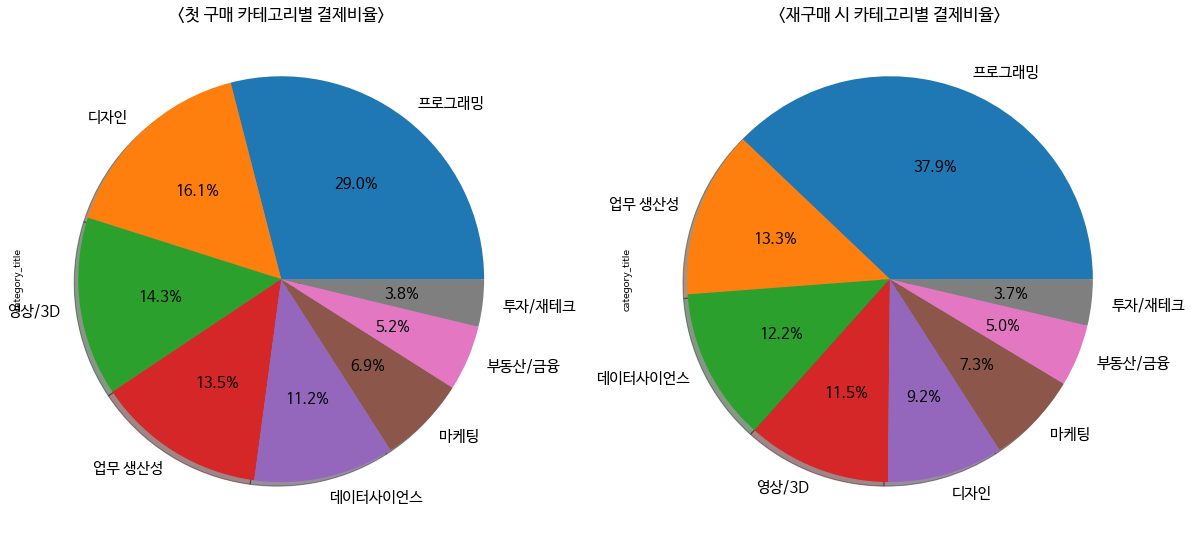

In [ ]:
# 첫 구매 시 결제한 카테고리와 재유입 되어 결제한 카테고리 비교

plt.subplot(1,2,1)
plt.title('<첫 구매 카테고리별 결제비율>',fontsize = 17)
df_wp['category_title'].value_counts().plot.pie(autopct='%1.1f%%',fontsize = 15, shadow=True)
plt.rcParams["figure.figsize"] = (20, 10)

plt.subplot(1,2,2)
plt.title('<재구매 시 카테고리별 결제비율>',fontsize = 17)
df_ttd['category_title'].value_counts().plot.pie(autopct='%1.1f%%',fontsize = 15, shadow=True)
plt.rcParams["figure.figsize"] = (20, 10)

plt.show()

In [ ]:
# 할인쿠폰 사용
wcu = (df_ttd['coupon_title'] != 'nan')
df_welcom_after_O = df_ttd[wcu]
df_welcom_after_O['after'] = '쿠폰O'

# 할인쿠폰 사용 안함
wcd = (df_ttd['coupon_title'] == 'nan')
df_welcom_after_X = df_ttd[wcd]
df_welcom_after_X['after'] = '쿠폰X'


df_welcom_after = pd.concat([df_welcom_after_O,df_welcom_after_X])
df_welcom_after

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,after
4,469863.0,202566.0,PAYMENT,COMPLETED,올인원 패키지 : 스케치&피그마를 활용한 모바일 UI 디자인,디자인,올인원,2021-03-28 22:11:28,101500,[럭키룰렛] 올인원패키지,20000.0,121500.0,NaN,CARD,UX/UI,2020-05-04,쿠폰O
12,462989.0,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-03-29 00:49:34,1000,수강생 50만명 돌파 기념 감사제 쿠폰,105500.0,106500.0,NaN,CARD,DevOps,NaT,쿠폰O
15,440315.0,201435.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 01:56:59,0,수강생 50만명 돌파 기념 감사제 쿠폰,115500.0,110500.0,NaN,PROMOTION,개발자 커리어,NaT,쿠폰O
21,457918.0,202357.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인을 위한 파이썬 데이터분석,데이터사이언스,올인원,2021-03-29 10:28:57,0,수강생 50만명 돌파 기념 감사제 쿠폰,119500.0,119500.0,NaN,PROMOTION,데이터분석,2020-03-13,쿠폰O
28,464927.0,200543.0,PAYMENT,COMPLETED,올인원 패키지 : 프론트엔드 (React),프로그래밍,올인원,2021-03-29 10:48:41,21500,수강생 50만명 돌파 기념 감사제 쿠폰,119000.0,140500.0,NaN,CARD,NaN,2019-04-19,쿠폰O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,613775.0,NaN,PAYMENT,COMPLETED,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),데이터사이언스,올인원,2021-09-23 00:05:01,1800000,nan,NaN,1800000.0,INICIS,CARD,NaN,NaT,쿠폰X
2469,525701.0,206717.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,올인원,2021-09-23 11:37:15,168000,nan,NaN,168000.0,INICIS,CARD,DevOps,2021-07-28,쿠폰X
2470,599109.0,205949.0,PAYMENT,COMPLETED,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,프로그래밍,올인원,2021-09-23 23:35:26,171000,nan,NaN,171000.0,INICIS,CARD,모바일앱,2021-07-09,쿠폰X
2472,543401.0,205421.0,PAYMENT,COMPLETED,올인원 패키지 : 박은종의 객체지향 설계를 위한 디자인패턴 with 자바,프로그래밍,올인원,2021-09-24 10:16:36,130000,nan,NaN,130000.0,INICIS,CARD,DevOps,2021-06-21,쿠폰X


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7fcb894cdb10>,
 [Text(0, 0, '쿠폰X'), Text(0, 0, '쿠폰O')])

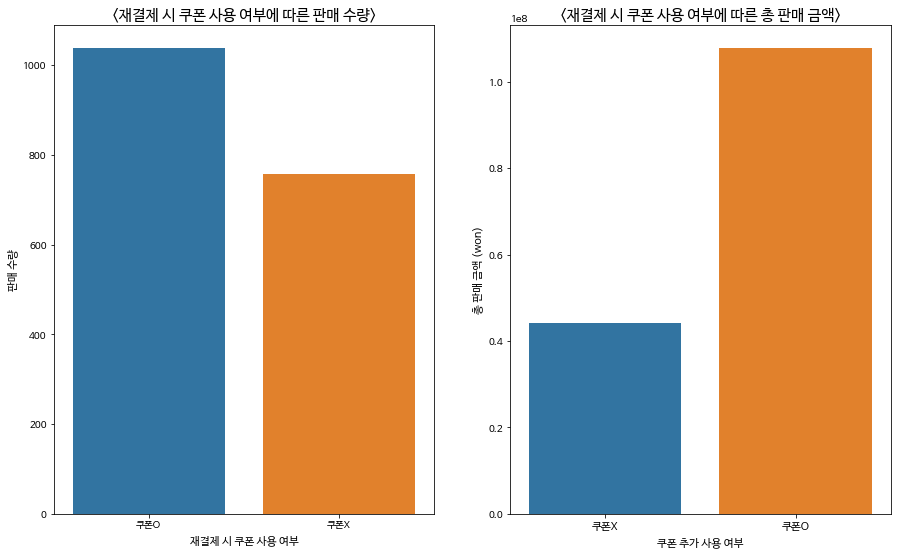

In [ ]:
#웰컴쿠폰 사용 후 추가 구매시 쿠폰 사용 여부에 따른 판매 수량
plt.figure(figsize=(15, 9))

plt.subplot(1,2,1)
sns.countplot(data=df_welcom_after,x='after')
plt.title('<재결제 시 쿠폰 사용 여부에 따른 판매 수량>',fontsize =15)
plt.xlabel('재결제 시 쿠폰 사용 여부',fontsize = 11)
plt.ylabel('판매 수량',fontsize = 11)

#웰컴쿠폰 사용 후 추가 쿠폰 사용 여부에 따른 총 판매 금액
revenue_of_welcome = df_welcom_after.groupby('after').transaction_amount.sum()

plt.subplot(1,2,2)
labels = ['쿠폰X','쿠폰O']
index = np.arange(len(labels))
sns.barplot(index,revenue_of_welcome)
plt.title('<재결제 시 쿠폰 사용 여부에 따른 총 판매 금액>',fontsize = 15)
plt.xlabel('쿠폰 추가 사용 여부',fontsize = 11)
plt.ylabel('총 판매 금액 (won)',fontsize = 11)
plt.xticks(index,labels,fontsize = 11)